# Ques 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
random.seed(0)

In [2]:
def train_test_split(data, fraction):
    """ a function that will get dataset and training dataset fraction as input and return x_train, x_test, y_train, y_test """
    
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    
    train_samples=len(data)*fraction
    
    for i in range(len(data)):
        one_hot=[0,0,0]
        
        if(data[i][0]=='M'):
            one_hot[0]=1
        elif(data[i][0]=='F'):
            one_hot[1]=1
        else:
            one_hot[2]=1
            
        new_sample=[1]
        
        for j in one_hot:
            new_sample.append(j)
        
        for j in range(1,9):
            new_sample.append(float(data[i][j]))

        
        
        if(i<train_samples):
            x_train.append(new_sample[:len(new_sample)-1])
            x_test.append(new_sample[-1])
            
        else:
            y_train.append(new_sample[:len(new_sample)-1])
            y_test.append(new_sample[-1])
    
    
    return x_train,x_test,y_train,y_test

In [3]:
def preprocess(x_train,x_test,y_train,y_test):
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    x_test=np.array(x_test)
    y_test=np.array(y_test)
    
    x_test=x_test.reshape((len(x_test),1))
    y_test=y_test.reshape((len(y_test),1))
    
    return x_train,x_test,y_train,y_test

In [4]:
file = open('abalone.data', 'r')
file = file.readlines()


# I will be using one hot encoding for sex as we need to have numeric values and not characters, that is, will add 3 columns
# if sex=M, then columns will contain 1 0 0
# if sex=F, then columns will contain 0 1 0
# if sex=I, then columns will contain 0 0 1
# also I will be adding another feature which will always be 1 (to get the weight w0, known as bias)
# hence in this case I will have 10 (3+7) input features

train_data=[]
test_data=[]

# Random shuffling
random.shuffle(file)

# splitting each string to make it to 9 features
for i in range(len(file)):
    file[i]= file[i].strip('\n')
    file[i]=file[i].split(',')
    

x_train,x_test,y_train,y_test=train_test_split(file,0.8)
x_train,x_test,y_train,y_test=preprocess(x_train,x_test,y_train,y_test)


# Part 1.1

In [5]:
def linear_regression_normal_equation(x_train,x_test,y_train,y_test):
    """ linear regression implemented through normal equation, that is w=(X.T*X)*(X.T*Y) """
    X=np.array(x_train)
    Y=np.array(x_test)
    Y=Y.reshape((len(x_test),1))
    
    w=np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,Y))

    rmse_x=0
    rmse_y=0
    for i in range(len(x_train)):
        pred=np.dot(w.T,x_train[i])
        rmse_x+=(pred-x_test[i])**2
    
    rmse_x=rmse_x[0]
    rmse_x=rmse_x/len(x_train)
    rmse_x=math.sqrt(rmse_x)
    
    for i in range(len(y_train)):
        pred=np.dot(w.T,y_train[i])
        rmse_y+=(pred-y_test[i])**2
    
    rmse_y=rmse_y[0]
    rmse_y=rmse_y/len(y_train)
    rmse_y=math.sqrt(rmse_y)
    
    print(w)
    print("Results using normal equation ")
    print("RMSE obtained on training set: "+str(rmse_x))
    print("RMSE obtained on testing set: "+str(rmse_y))
    
    
def linear_regression_using_gradient(x_train,x_test,y_train,y_test,lr,epochs):
    """ linear regression implemented through gradient descent, gradient=2/m sigma(h(x)-y)*wi """
    w=np.random.rand(11,1)
    
    x_train=np.array(x_train)
    x_test=np.array(x_test)
    x_test=x_test.reshape(len(x_test),1)
    y_train=np.array(y_train)
    y_test=np.array(y_test)
    y_test=y_test.reshape(len(y_test),1)
    
    rmse_x_vs_epochs=[]
    rmse_y_vs_epochs=[]
    
    for e in range(epochs):
    
        grad_calc=0
        rmse_x=0
        rmse_y=0
        
        x_pred=np.dot(x_train,w)

        grad=np.matmul(x_train.T,x_pred-x_test)
        grad=grad/len(x_train)

        rmse_x=np.dot((x_pred-x_test).T,x_pred-x_test)
        rmse_x=rmse_x/len(x_train)
        rmse_x=math.sqrt(rmse_x)
        rmse_x_vs_epochs.append((rmse_x,e))
        
        y_pred=np.dot(y_train,w)
        rmse_y=np.dot((y_pred-y_test).T,y_pred-y_test)

        rmse_y=rmse_y/len(y_train)
        rmse_y=math.sqrt(rmse_y)
        rmse_y_vs_epochs.append((rmse_y,e))
        
        w=w-grad*lr
    print(w)
    return rmse_x_vs_epochs,rmse_y_vs_epochs
    

In [6]:
rmse_x_vs_epochs,rmse_y_vs_epochs=linear_regression_using_gradient(x_train,x_test,y_train,y_test,0.4,500)

[[ 3.61638395]
 [ 1.66646466]
 [ 1.80694068]
 [ 0.60320573]
 [ 3.78423796]
 [ 3.46148114]
 [ 3.10294972]
 [ 2.88255042]
 [-8.29736872]
 [-0.37173961]
 [ 7.49250995]]


In [7]:
print(rmse_x_vs_epochs[-1])

(2.3057035597352282, 499)


In [8]:
linear_regression_normal_equation(x_train,x_test,y_train,y_test)

[[  2.82819714]
 [  1.23107879]
 [  1.24441768]
 [  0.35270067]
 [  0.46071015]
 [  9.65849988]
 [  9.83133022]
 [  8.66370115]
 [-19.28777235]
 [-10.08164727]
 [  9.12402236]]
Results using normal equation 
RMSE obtained on training set: 2.1815450172812008
RMSE obtained on testing set: 2.233732312296196


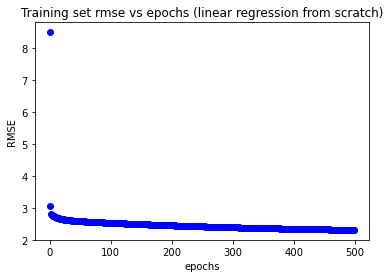

In [9]:
for i in rmse_x_vs_epochs:
    plt.scatter(i[1],i[0],c='b')

plt.xlabel('epochs')
plt.ylabel('RMSE')

plt.title('Training set rmse vs epochs (linear regression from scratch)')
plt.show()

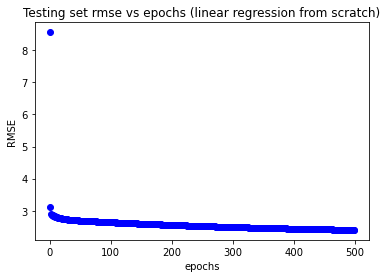

In [10]:
for i in rmse_y_vs_epochs:
    plt.scatter(i[1],i[0],c='b')

plt.xlabel('epochs')
plt.ylabel('RMSE')

plt.title('Testing set rmse vs epochs (linear regression from scratch)')
plt.show()

# Part 1.2 a)

In [51]:
def ridge_regression(x_train,x_test,y_train,y_test):
    
    rmse_list=[]
    alpha=np.linspace(0.01,1,500)
    for i in alpha:
        model=Ridge(alpha=i,normalize=True,random_state=0)
        model.fit(x_train,x_test)
        pred=model.predict(y_train)
        
        y_test=y_test.reshape(-1)
        rmse=metrics.mean_squared_error(y_test, pred,squared=False)
            
        rmse_list.append(rmse)
        
    for i in range(len(alpha)):
        plt.scatter(alpha[i],rmse_list[i],c='b')

    plt.xlabel('Alpha')
    plt.ylabel('RMSE')

    plt.title('Testing set rmse vs alpha ')
    plt.show()
    

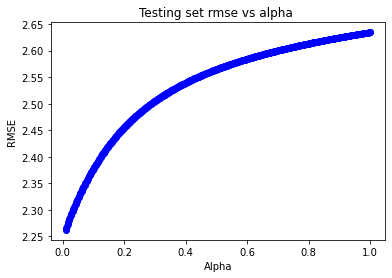

In [52]:
ridge_regression(x_train,x_test,y_train,y_test)

In [49]:
def lasso_regression(x_train,x_test,y_train,y_test):
            
    rmse_list=[]
    alpha=np.linspace(1e-4,1,1000)
    for i in alpha:
        model=Lasso(alpha=i)
        model.fit(x_train,x_test)
        pred=model.predict(y_train)
        rmse=metrics.mean_squared_error(y_test, pred,squared=False)
        rmse_list.append(rmse)
        
    for i in range(len(alpha)):
        plt.scatter(alpha[i],rmse_list[i],c='b')

    plt.xlabel('Alpha')
    plt.ylabel('RMSE')

    plt.title('Testing set rmse vs alpha ')
    plt.show()

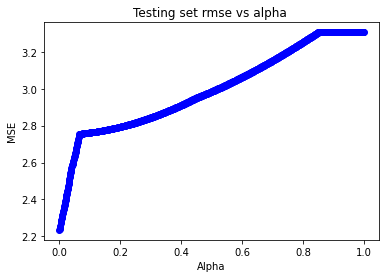

In [50]:
lasso_regression(x_train,x_test,y_train,y_test)

# Part 1.2 b)

In [47]:
def find_best_params(x_train,x_test,y_train,y_test):
    ridge=Ridge()
    lasso=Lasso()
    lrs=np.linspace(1e-4,1,1000)
    ridge_model=GridSearchCV(estimator=ridge,param_grid=dict(alpha=lrs))
    lasso_model=GridSearchCV(estimator=lasso,param_grid=dict(alpha=lrs))
    ridge_model.fit(x_train,x_test)
    lasso_model.fit(x_train,x_test)
    
    print("Best alpha estimate for ridge: "+str(ridge_model.best_estimator_.alpha))
    print("Best alpha estimate for lasso: "+str(lasso_model.best_estimator_.alpha))
    
    print("Best coef of ridge "+str(ridge_model.best_estimator_.coef_))
    print("Best coef of lasso "+str(lasso_model.best_estimator_.coef_))
    

In [48]:
find_best_params(x_train,x_test,y_train,y_test)

Best alpha estimate for ridge: 0.4995495495495495
Best alpha estimate for lasso: 0.0021018018018018015
Best coef of ridge [[  0.           0.29311446   0.31633844  -0.6094529    2.26100397
    7.16360971   8.15681689   7.36493183 -17.79441338  -7.79120804
   10.25734113]]
Best coef of lasso [ 0.00000000e+00 -0.00000000e+00  1.62016025e-02 -8.98358961e-01
  3.45082086e-01  8.81025497e+00  6.99382433e+00  6.99859674e+00
 -1.76085868e+01 -5.96291949e+00  1.06122607e+01]
